# NYC Food Ratings And Inspection Grades Analysis


## Introduction:
New York City is known as one of the best cities in the world for food. NYC is full of people from all different backgrounds, ethnicities, and regions of the world. Because of this, you can find virtually any type of cuisine you can think of in NYC. This also has lead to the creation of many different fusions and new flavor combinations. In addition to a variety of cuisines, NYC also consists of a range of restaurants, from little street carts to world class Michelin star restaurants. All of these types of restaurants along with the ability to be located in such a populous, food forward city, have potential to be enormously successful businesses. 

One of the most important pieces to being a successful restaurant is being able to drive people through your door and into your restaurant to purchase a meal. In today's technology forward world, many NYC locals and visitors frequently turn to the internet for information about restaurants they may want to eat at. Information and reviews available on the internet has the potential to greatly help or hurt each restaurant depending on the positive or negative information available. Yelp, a website where users can write reviews and ratings for different businesses (including restaurants), is often a starting research point for many as it allows consumers to get an idea of other customers' experience at each business/restaurant. Having a high Yelp rating is likely to increase the number of consumers eating at your restaurant, while a low rating could scare customers away. Another important aspect that many consumers consider prior to eating at a restaurant is what inspection grade the restaurant has been given. Receiving a 'B' or 'C' grade could indicate that significant sanitary violations were found at the restaurant, which can deter many from eating there.

The goal of this analysis is to dive into NYC restaurant Yelp and inspection data, most specifically in Manhattan, in order to determine if any particular aspects of a restaurant can help influence the likely inspection grade, Yelp rating, and amount of Yelp reviews a restaurant receives. This analysis will be most helpful for people in or interested in joining the restaurant world in NYC as it can help them identify certain aspects (i.e. cuisine type, location, price level, etc.) that can have an influence on their Yelp ratings/reviews and inspection grades, which in turn could impact the success potential of the restuarant.


## Methodology
For this project, I will be utilizing three different workbooks which are set up using the OSEMiN data science process framework as layed out below:
1. __Obtain__ - Import the data, take an initial look through the data, and gather all necessary information and resources.
2. __Scrub__ - This is when we will pre-process and clean our data so that it is ready for analysis. Steps may include changing to appropriate datatypes, removing unnecesary data/columns, and reformatting data where needed.
3. __Explore__ - Dive into the data through analyses and visualizations to better understand what we will be modeling.
4. __Model__ - Build and fit model appropriate to the dataset. Adjust and approve model to best fit the data.
5. __Interpret__ - Look at the results of the model and evaluate what they mean. Communicate these results to key stakeholders so that they are aware of your findings.

We will be utilizing 2 different types of analyses: Hypothesis Testing and Machine Learning (Classification). This workbook contains Parts 1-3, and then there is a separate notebook for Parts 4-5 in relation to Hypothesis Testing and an additional separate notebook for Parts 4-5 in relation to a Machine Learning Classification analysis. 

We will be using two different datasets for this project as listed below:
1. **Yelp data** - provides information about businesses. We will be looking specifically at restaurants in Manhattan
2. **Restaurant Inspection data** - provides information about restaurant inspections for all NYC restaurants.

Let's begin!

# Part 1: Obtain

First we need to import all necessary libraries that we will be working with:

In [1]:
# Importing libraries to collect and import data:
import json 
import requests 
import pickle

# Importing libraries to work with/explore data:
import pandas as pd
import numpy as np
import datetime, time
from sklearn import preprocessing

# Importing libraries to create visualizations:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# import itertools
import warnings
warnings.filterwarnings('ignore')

## 1.1 Collect And Import Yelp Data

We will first import our Yelp data which is available through the Yelp API. To get our data, we need to begin by setting up a function to pull in our keys. The keys are used to draw the API data from the Yelp website. After pulling all of this data I saved it in a csv so that I would not have to repeat the process everytime I entered the workbook. Therefore, I have made the below cells not runnable for now so that we don't have to waste time pulling in new data every time.

So to start, let's gather our keys.

In [2]:
## Define function to gather keys:
# def get_keys(path):
#     with open(path) as f:
#         return json.load(f)

In [3]:
## Pull in keys and specifically draw out the api key. I have removed the specific path to the keys 
## for security purposes:
# keys = get_keys("/Users/'INSERTPATH'/yelp_api.json")

# api_key = keys['api_key']

We also need to identify what url we want to pull our data from and we need to identify our headers:

In [4]:
## URL to pull data from:
#url = 'https://api.yelp.com/v3/businesses/search'

## Identify headers:
# headers = {'Authorization': 'Bearer {}'.format(api_key)}

With the Yelp API data, there are limits to how much data can be pulled at once. You are allowed to pull 1,000 results at a time and only 50 per request. There are many more than 1,000 resturants in NY, so in order to get around this limitation, we are going to pull 1,000 restaurants from each different Manhattan neighborhood. The neighborhoods used can be found on the following nyc tourist website.
https://www.nyctourist.com/million-manhattan.htm

I first will create a list of all of these neighborhoods. Then, I'll create a temporary dataframe which will hold our data. Finally, I will create a function to pull up to 1,000 results for each different neighborhood. This function takes a bit of time to pull in, so after running it once, I saved the data in a dataset that could be easily pulled in later.

In [5]:
## List of Manhattan neighborhoods from https://www.nyctourist.com/million-manhattan.htm
# neighborhoods = ['Midtown West', 'Greenwich Village', 'East Harlem', 'Upper East Side', 'Midtown East',
#                  'Gramercy', 'Little Italy', 'Chinatown', 'SoHo', 'Harlem',
#                  'Upper West Side', 'Tribeca', 'Garment District', 'Stuyvesant Town', 'Financial District',
#                  'Chelsea', 'Morningside Heights', 'Times Square', 'Murray Hill', 'East Village',
#                  'Lower East Side', 'Hell\s Kitchen', 'Central Park']

In [6]:
## Create temporary dataframe to hold data:
# nyc = [[] for i in range(len(neighborhoods))] 

I have created a function below that will pull up to 1,000 results for each different neighborhood and will store the data in the temporary dataframe we created in the last step. 

In [7]:
# Function to draw in data for each neighborhood:
# for x in range(len(neighborhoods)):
#     print('---------------------------------------------')
#     print('Gathering Data for {}'.format(neighborhoods[x]))
#     print('---------------------------------------------')


#     for y in range(20):
#         location = neighborhoods[x]+', Manhattan, NY'
#         term = "Restaurants"
#         search_limit = 50
#         offset = 50 * y
#         categories = "(restaurants, All)"
#         sort_by = 'distance'

#         url_params = {
#                         'location': location.replace(' ', '+'),
#                         'term' : term,
#                         'limit': search_limit,
#                         'offset': offset,
#                         'categories': categories,
#                         'sorty_by': sort_by
#                     }
        
#         response = requests.get(url, headers=headers, params=url_params)
#         print('***** {} Restaurants #{} - #{} ....{}'.format(neighborhoods[x], 
#                                                              offset+1, offset+search_limit,
#                                                              response))
#         nyc[x].append(response)

# print(response)
# print(type(response.text))
# print(response.json().keys())
# print(response.text[:1000])

Once the data was pulled, I then checked for any empty business lists which would need to be removed when compiling the data into a dataframe. Any empty lists will be removed when pulling the data into our final dataframe.

In [8]:
## Check for any empty business lists:
# for x in range(len(neighborhoods)):
#     for y in range(20):
#         num = len(nyc[x][y].json()['businesses'])
#         if num != 50:
#             print(neighborhoods[x], y, num)

In [9]:
## Save the compiled data into dataframe and remove any empty data:
# df = pd.DataFrame()
# for x in range(len(neighborhoods)):
#     if x == 6: # Little Italy has a total of 486 restaurants
#         for y in range(10):
#             df_temp = pd.DataFrame.from_dict(nyc[x][y].json()['businesses'])
#             df_temp.loc[:,'neighborhood'] = neighborhoods[x]
#             df = df.append(df_temp)
#     if x == 13: # Stuyvesant Town has a total of 417 restaurants
#         for y in range(10):
#             df_temp = pd.DataFrame.from_dict(nyx[x][y].json()['businesses'])
#             df_temp.loc[:,'neighborhood'] = neighborhoods[x]
#             df = df.append(df_temp)

#     else:
#         for y in range(20):
#             df_temp = pd.DataFrame.from_dict(nyc[x][y].json()['businesses'])
#             df_temp.loc[:,'neighborhood'] = neighborhoods[x]
#             df = df.append(df_temp)

Now that we have all of our data pulled, let's pickle our dataset so it is saved and we can easily reference it later on without having to re-pull the data each time.

In [10]:
# Save Dataset: (data pulled 8/25/20)
# with open ('data.pickle','wb')as f:
#     pickle.dump(df, f)

Great, now we can easily import the saved dataset!

In [2]:
# Import Data:
with open ('data.pickle','rb') as f:
    df = pickle.load(f)

print(len(df))
df.head()

22478


alias  \
0                                    obao-new-york-3   
1  carmines-italian-restaurant-times-square-new-y...   
2                          dim-sum-palace-new-york-8   
3             hold-fast-kitchen-and-spirits-new-york   
4                     boqueria-west-40th-st-new-york   

                                          categories  \
0  [{'alias': 'vietnamese', 'title': 'Vietnamese'...   
1  [{'alias': 'italian', 'title': 'Italian'}, {'a...   
2  [{'alias': 'dimsum', 'title': 'Dim Sum'}, {'al...   
3  [{'alias': 'cocktailbars', 'title': 'Cocktail ...   
4  [{'alias': 'tapasmallplates', 'title': 'Tapas/...   

                                         coordinates   display_phone  \
0  {'latitude': 40.7606544, 'longitude': -73.991332}  (212) 245-8880   
1  {'latitude': 40.7574955824307, 'longitude': -7...  (212) 221-3800   
2   {'latitude': 40.76015, 'longitude': -73.9893699}  (646) 861-1910   
3     {'latitude': 40.76064, 'longitude': -73.99023}  (917) 261-6691   
4     {'latitude': 40.75558, 'longitude': -73.99012}  (212) 255-6047   

     distance                      id  \
0  155.087703  NN3mOWF5e_pnR1ArqM2bHQ   
1  395.142057  22nKUyCIbpnzR6R3_g1ptQ   
2  147.353923  bVkjBJlAIwKAj9Aw1KVWjA   
3  141.719996  VLGmFHE4s0Sfu0piMVQa1Q   
4  423.350744  9yc2V6zNpLG58uPV_ykBog   

                                           image_url  is_closed  \
0  https://s3-media4.fl.yelpcdn.com/bphoto/CpVI2X...      False   
1  https://s3-media1.fl.yelpcdn.com/bphoto/0UszeE...      False   
2  https://s3-media1.fl.yelpcdn.com/bphoto/CiBorf...      False   
3  https://s3-media2.fl.yelpcdn.com/bphoto/A0KyqQ...      False   
4  https://s3-media1.fl.yelpcdn.com/bphoto/hFwzeL...      False   

                                            location  \
0  {'address1': '647 9th Ave', 'address2': '', 'a...   
1  {'address1': '200 W 44th St', 'address2': '', ...   
2  {'address1': '334 W 46th St', 'address2': None...   
3  {'address1': '364 W 46th St', 'address2': None...   
4  {'address1': '260 W 40th St', 'address2': None...   

                                          name         phone price  rating  \
0                                         OBAO  +12122458880    $$     4.0   
1  Carmine's Italian Restaurant - Times Square  +12122213800    $$     4.0   
2                               Dim Sum Palace  +16468611910    $$     4.0   
3                Hold Fast Kitchen and Spirits  +19172616691    $$     5.0   
4                        Boqueria West 40th St  +12122556047    $$     4.0   

   review_count        transactions  \
0          2598  [delivery, pickup]   
1          3776  [delivery, pickup]   
2          1257  [delivery, pickup]   
3           342                  []   
4           409  [delivery, pickup]   

                                                 url  neighborhood  
0  https://www.yelp.com/biz/obao-new-york-3?adjus...  Midtown West  
1  https://www.yelp.com/biz/carmines-italian-rest...  Midtown West  
2  https://www.yelp.com/biz/dim-sum-palace-new-yo...  Midtown West  
3  https://www.yelp.com/biz/hold-fast-kitchen-and...  Midtown West  
4  https://www.yelp.com/biz/boqueria-west-40th-st...  Midtown West

## 1.2 Inspection Data
Now let's take a look at the second dataset we will be working with. Here, we will be pulling in data providing information on restaurant inspections for NYC restaurants. The data was exported on 8/25/20 as a CSV from https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j  

In [3]:
# Input restaurant inspection data (collected 8/25/20)
df_inspec = pd.read_csv('New_York_City_Restaurant_Inspection_Results.csv')
df_inspec.head()

CAMIS                     DBA       BORO BUILDING            STREET  \
0  50018118                 LA LUPE   Brooklyn        9  JEFFERSON STREET   
1  50005184              HIBINO LIC     Queens    10-70    JACKSON AVENUE   
2  41547472    MAOZ Falafel & Grill  Manhattan      683          8 AVENUE   
3  50003914  NEW JIN XIN RESATURANT   Brooklyn     7102         18 AVENUE   
4  50059144           GRAY'S PAPAYA  Manhattan      612          8 AVENUE   

   ZIPCODE       PHONE CUISINE DESCRIPTION INSPECTION DATE  \
0  11206.0  3477152455             Mexican      07/13/2018   
1  11101.0  7183925190            Japanese      12/29/2016   
2  10036.0  2122652315            American      04/03/2019   
3  11204.0  7188372820             Chinese      10/16/2018   
4  10018.0  2123020462             Hotdogs      08/17/2017   

                                            ACTION  ...  RECORD DATE  \
0                 Establishment re-closed by DOHMH  ...   08/25/2020   
1  Violations were cited in the following area(s).  ...   08/25/2020   
2  Violations were cited in the following area(s).  ...   08/25/2020   
3  Violations were cited in the following area(s).  ...   08/25/2020   
4  Violations were cited in the following area(s).  ...   08/25/2020   

                           INSPECTION TYPE   Latitude  Longitude  \
0  Cycle Inspection / Reopening Inspection  40.697325 -73.934902   
1    Cycle Inspection / Initial Inspection  40.742817 -73.952086   
2    Cycle Inspection / Initial Inspection  40.758046 -73.989204   
3         Cycle Inspection / Re-inspection  40.615598 -73.993751   
4    Cycle Inspection / Initial Inspection  40.755702 -73.990890   

  Community Board Council District Census Tract        BIN           BBL   NTA  
0           304.0             34.0      38900.0  3071999.0  3.031600e+09  BK78  
1           402.0             26.0        700.0  4000253.0  4.000430e+09  QN31  
2           104.0              3.0      12100.0  1024967.0  1.010340e+09  MN15  
3           311.0             43.0      26400.0  3157884.0  3.061820e+09  BK28  
4           105.0              3.0      11300.0  1014513.0  1.007890e+09  MN17  

[5 rows x 26 columns]

Great, now we have obtained all of our data! Let's move on to scrubbing our data so that we have a clean dataset with all data points able to be used in our models.

# Part 2: Scrub

## 2.1 Yelp Data

### 2.1.1 Remove Duplicative Data

The first thing I will do with the Yelp data is check for and remove duplicated restaurants as we only want one row per restaurant. 

In [4]:
# Add a column that counts how many data entries have the same id (and therefore represent the same restaurant):
df['count'] = df.groupby('id')['id'].transform('count')

# Sort values by name and id:
df_sorted = df.sort_values(by=['alias', 'id'])

# Drop duplicate values:
df_filtered = df_sorted.drop_duplicates(subset=['alias', 'id'], keep='first', inplace=False).copy()

# Double check no duplicates remain:
df_filtered['count'] = df_filtered.groupby('id')['id'].transform('count')
print('# of Restaurants in Manhattan: ', len(df_filtered))
print('# of duplicates: ', len(df_filtered[df_filtered['count'] > 1]))
df_filtered.reset_index(inplace=True, drop = True)
df_filtered.head()

# of Restaurants in Manhattan:  6558
# of duplicates:  0


alias  \
0           1-columbia-deli-new-york   
1             1-noodle-cart-new-york   
2               1-up-bistro-new-york   
3  108-food-dried-hot-pot-new-york-2   
4  109-spicy-gourmet-deli-new-york-2   

                                          categories  \
0             [{'alias': 'delis', 'title': 'Delis'}]   
1  [{'alias': 'foodstands', 'title': 'Food Stands...   
2  [{'alias': 'newamerican', 'title': 'American (...   
3  [{'alias': 'hotpot', 'title': 'Hot Pot'}, {'al...   
4  [{'alias': 'beer_and_wine', 'title': 'Beer, Wi...   

                                        coordinates   display_phone  \
0    {'latitude': 40.8118, 'longitude': -73.957643}  (212) 932-1290   
1  {'latitude': 40.717617, 'longitude': -74.000575}                   
2  {'latitude': 40.7881799, 'longitude': -73.95365}  (917) 492-0697   
3    {'latitude': 40.80271, 'longitude': -73.96738}  (917) 675-6878   
4    {'latitude': 40.80231, 'longitude': -73.96456}  (212) 280-7329   

      distance                      id  \
0   583.849193  ZJRC1aIv4CIG6qMKZCR2bQ   
1   334.335889  oinbMkOklSpTiMoS24jppQ   
2  1679.770523  dFPLilNrMi9KhhXQTEix5w   
3  2092.153963  bgnM6uy66zupYzb4QdL3vA   
4   642.364148  z2-4-SSHYQI5cOShuZ4emg   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/KGvots...      False   
1  https://s3-media4.fl.yelpcdn.com/bphoto/8G_u1v...      False   
2  https://s3-media3.fl.yelpcdn.com/bphoto/osl0Fd...      False   
3  https://s3-media1.fl.yelpcdn.com/bphoto/NJOoE5...      False   
4  https://s3-media3.fl.yelpcdn.com/bphoto/Qho7dA...      False   

                                            location                    name  \
0  {'address1': '1290 Amsterdam Ave', 'address2':...        #1 Columbia Deli   
1  {'address1': '147 Ctr St', 'address2': None, '...          $1 Noodle Cart   
2  {'address1': '1404 Madison Ave', 'address2': '...             1 Up Bistro   
3  {'address1': '2794 Broadway', 'address2': None...  108 Food Dried Hot Pot   
4  {'address1': '990 Amsterdam Ave', 'address2': ...  109 Spicy Gourmet Deli   

          phone price  rating  review_count        transactions  \
0  +12129321290   NaN     2.5             3  [delivery, pickup]   
1                 NaN     3.0             3                  []   
2  +19174920697   NaN     3.5             6  [delivery, pickup]   
3  +19176756878    $$     3.5           139  [delivery, pickup]   
4  +12122807329     $     3.5            45  [delivery, pickup]   

                                                 url         neighborhood  \
0  https://www.yelp.com/biz/1-columbia-deli-new-y...  Morningside Heights   
1  https://www.yelp.com/biz/1-noodle-cart-new-yor...         Little Italy   
2  https://www.yelp.com/biz/1-up-bistro-new-york?...          East Harlem   
3  https://www.yelp.com/biz/108-food-dried-hot-po...          East Harlem   
4  https://www.yelp.com/biz/109-spicy-gourmet-del...  Morningside Heights   

   count  
0      1  
1      1  
2      1  
3      1  
4      1

### 2.1.2 Remove Unnecessary Columns

Next I will remove any columns that would not be helpful for our analysis and therefore should be removed.

In [5]:
# Remove columns that we will not be working with:
df_filtered.drop(columns = ['alias', 'distance', 'id', 'image_url', 'is_closed', 'phone', 'url',
                            'count'], inplace = True, axis=1)

### 2.1.3 Feature Engineering

A few of our columns have data stored in dictionaries. It will be difficult to work with this data if left in its current form, so I am going to extract the values from each dictionary.

In [6]:
# Extract dictionary values for the category, latitude, longitude, and location:
df_filtered['categories_clean'] = df_filtered['categories'].apply(lambda a: [x['alias'] for x in a])
df_filtered['latitude'] = df_filtered['coordinates'].apply(lambda x: x.get('latitude'))
df_filtered['longitude'] = df_filtered['coordinates'].apply(lambda x: x.get('longitude'))
df_filtered['address'] = df_filtered['location'].apply(lambda x: x.get('address1'))
df_filtered['city'] = df_filtered['location'].apply(lambda x: x.get('city'))
df_filtered['zip_code'] = df_filtered['location'].apply(lambda x: x.get('zip_code'))
df_filtered['state'] = df_filtered['location'].apply(lambda x: x.get('state'))

# Remove original categories, coordinates, and location columns:
df_filtered.drop(columns=['categories','coordinates', 'location'], inplace = True, axis=1)

# Print first 5 rows to ensure the data pulled in correctly:
df_filtered.head()

display_phone                    name price  rating  review_count  \
0  (212) 932-1290        #1 Columbia Deli   NaN     2.5             3   
1                          $1 Noodle Cart   NaN     3.0             3   
2  (917) 492-0697             1 Up Bistro   NaN     3.5             6   
3  (917) 675-6878  108 Food Dried Hot Pot    $$     3.5           139   
4  (212) 280-7329  109 Spicy Gourmet Deli     $     3.5            45   

         transactions         neighborhood  \
0  [delivery, pickup]  Morningside Heights   
1                  []         Little Italy   
2  [delivery, pickup]          East Harlem   
3  [delivery, pickup]          East Harlem   
4  [delivery, pickup]  Morningside Heights   

                           categories_clean   latitude  longitude  \
0                                   [delis]  40.811800 -73.957643   
1                     [foodstands, noodles]  40.717617 -74.000575   
2                 [newamerican, sandwiches]  40.788180 -73.953650   
3                         [hotpot, chinese]  40.802710 -73.967380   
4  [beer_and_wine, sandwiches, convenience]  40.802310 -73.964560   

              address      city zip_code state  
0  1290 Amsterdam Ave  New York    10027    NY  
1          147 Ctr St  New York    10013    NY  
2    1404 Madison Ave  New York    10029    NY  
3       2794 Broadway  New York    10025    NY  
4   990 Amsterdam Ave  New York    10025    NY

### 2.1.4 Dealing With Categorical Data

Continuing with cleaning up our data, let's see what types of data we have in each column.

In [7]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 14 columns):
display_phone       6558 non-null object
name                6558 non-null object
price               5394 non-null object
rating              6558 non-null float64
review_count        6558 non-null int64
transactions        6558 non-null object
neighborhood        6558 non-null object
categories_clean    6558 non-null object
latitude            6557 non-null float64
longitude           6557 non-null float64
address             6546 non-null object
city                6558 non-null object
zip_code            6558 non-null object
state               6558 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 717.4+ KB


We have a few columns of categorical data in this dataset. When running our models, it will be helpful to have numerical data rather than categorical data, so we will need to transform some of our data. For now, I will transform both the categories and transactions columns using dummy variables so that each response will become its own column. For some of the other categorical columns (i.e. name, city) we will not be using these columns in our model and so do not need to convert to numerical data at this time.

In [8]:
# Get dummy variables for categorical columns (categories and transactions):
categories_dummy = df_filtered['categories_clean'].str.join(sep=',').str.get_dummies(sep=',')
transactions_dummy = df_filtered['transactions'].str.join(sep=',').str.get_dummies(sep=',')

# Combine new columns with original dataframe:
df_filtered = pd.concat([df_filtered, categories_dummy, transactions_dummy], axis=1)
df_filtered.head()

display_phone                    name price  rating  review_count  \
0  (212) 932-1290        #1 Columbia Deli   NaN     2.5             3   
1                          $1 Noodle Cart   NaN     3.0             3   
2  (917) 492-0697             1 Up Bistro   NaN     3.5             6   
3  (917) 675-6878  108 Food Dried Hot Pot    $$     3.5           139   
4  (212) 280-7329  109 Spicy Gourmet Deli     $     3.5            45   

         transactions         neighborhood  \
0  [delivery, pickup]  Morningside Heights   
1                  []         Little Italy   
2  [delivery, pickup]          East Harlem   
3  [delivery, pickup]          East Harlem   
4  [delivery, pickup]  Morningside Heights   

                           categories_clean   latitude  longitude  \
0                                   [delis]  40.811800 -73.957643   
1                     [foodstands, noodles]  40.717617 -74.000575   
2                 [newamerican, sandwiches]  40.788180 -73.953650   
3                         [hotpot, chinese]  40.802710 -73.967380   
4  [beer_and_wine, sandwiches, convenience]  40.802310 -73.964560   

            ...           waffles walkingtours wedding_planning whiskeybars  \
0           ...                 0            0                0           0   
1           ...                 0            0                0           0   
2           ...                 0            0                0           0   
3           ...                 0            0                0           0   
4           ...                 0            0                0           0   

   wine_bars  womenscloth  wraps  delivery  pickup  restaurant_reservation  
0          0            0      0         1       1                       0  
1          0            0      0         0       0                       0  
2          0            0      0         1       1                       0  
3          0            0      0         1       1                       0  
4          0            0      0         1       1                       0  

[5 rows x 282 columns]

Next I will manipulate the categories_clean column in order to determine which restaurants are in a mainstream category vs. a rare category. A mainstream category is any category that appeared at least 150 times in our dataset.

In [9]:
# Add in number of categories:
df_filtered['num_of_cat'] = df_filtered['categories_clean'].apply(lambda x: len(x))

# Find the most frequent categories (anything with over 150 entries):
all_category = pd.DataFrame(categories_dummy.sum().sort_values(ascending=False))
category = list(all_category[all_category[0] > 150].index)

# Identify each restaurant as either being a mainstream or a rare category:
df_filtered['mainstream_category'] = np.sum(df_filtered[category], axis = 1)
df_filtered['rare_category'] = 0
df_filtered.loc[df_filtered['mainstream_category'] == 0, 'rare_category'] = 1
df_filtered.loc[df_filtered['mainstream_category'] != 0, 'mainstream_category'] = 1

# Check that new columns show up correctly:
df_filtered.head()

display_phone                    name price  rating  review_count  \
0  (212) 932-1290        #1 Columbia Deli   NaN     2.5             3   
1                          $1 Noodle Cart   NaN     3.0             3   
2  (917) 492-0697             1 Up Bistro   NaN     3.5             6   
3  (917) 675-6878  108 Food Dried Hot Pot    $$     3.5           139   
4  (212) 280-7329  109 Spicy Gourmet Deli     $     3.5            45   

         transactions         neighborhood  \
0  [delivery, pickup]  Morningside Heights   
1                  []         Little Italy   
2  [delivery, pickup]          East Harlem   
3  [delivery, pickup]          East Harlem   
4  [delivery, pickup]  Morningside Heights   

                           categories_clean   latitude  longitude  \
0                                   [delis]  40.811800 -73.957643   
1                     [foodstands, noodles]  40.717617 -74.000575   
2                 [newamerican, sandwiches]  40.788180 -73.953650   
3                         [hotpot, chinese]  40.802710 -73.967380   
4  [beer_and_wine, sandwiches, convenience]  40.802310 -73.964560   

       ...       whiskeybars wine_bars womenscloth wraps  delivery  pickup  \
0      ...                 0         0           0     0         1       1   
1      ...                 0         0           0     0         0       0   
2      ...                 0         0           0     0         1       1   
3      ...                 0         0           0     0         1       1   
4      ...                 0         0           0     0         1       1   

   restaurant_reservation  num_of_cat  mainstream_category  rare_category  
0                       0           1                    1              0  
1                       0           2                    1              0  
2                       0           2                    1              0  
3                       0           2                    1              0  
4                       0           3                    1              0  

[5 rows x 285 columns]

### 2.1.5 Dealing With Missing Data

Now I will see if we have any null values (or missing data) in our dataframe. If we do, they will need to be dealt with.

In [10]:
# Check if we have any null values:
df_filtered.isnull().sum()

display_phone                0
name                         0
price                     1164
rating                       0
review_count                 0
transactions                 0
neighborhood                 0
categories_clean             0
latitude                     1
longitude                    1
address                     12
city                         0
zip_code                     0
state                        0
acaibowls                    0
afghani                      0
african                      0
arabian                      0
arcades                      0
argentine                    0
artclasses                   0
artspacerentals              0
asianfusion                  0
australian                   0
austrian                     0
bagels                       0
bakeries                     0
bangladeshi                  0
barbers                      0
bars                         0
                          ... 
thai                         0
theater 

It looks like we have a lot null values for price. Let's replace those with zero to represent that there is an unknown price. In addition, I am going to update the values in the price column to be numerical rather than just dollar signs. We also have some null values in the latitude, longitude, and address columns. Since there are so few missing values here, we will remove the rows that have missing data.

In [11]:
# Replace null values in the price column with 'zero'
df_filtered['price'].fillna(value='N/A', inplace=True)

# Update price to be numerical values:
price = {'$': 1, '$$': 2, '$$$':3, '$$$$': 4, 'N/A': 0}
df_filtered['price_value'] = df_filtered['price'].map(price)

# Remove null values from latitude, longitude, and address columns:
df_filtered.dropna(inplace=True)

### 2.1.6 Dealing With Outliers

Lastly, let's see if we have any outliers. If we do, those will need to be dealt with as they can skew our data analysis results.

In [12]:
# Check for outliers:
df_filtered.describe()

rating  review_count     latitude    longitude    acaibowls  \
count  6545.000000   6545.000000  6545.000000  6545.000000  6545.000000   
mean      3.873720    317.051642    40.742818   -73.945712     0.001528   
std       0.618503    530.307311     0.667691     3.220564     0.039061   
min       0.000000      0.000000     3.174880  -122.671390     0.000000   
25%       3.500000     39.000000    40.727450   -73.994328     0.000000   
50%       4.000000    155.000000    40.749724   -73.985011     0.000000   
75%       4.000000    392.000000    40.776300   -73.964322     0.000000   
max       5.000000  12340.000000    45.629384   101.659538     1.000000   

           afghani      african      arabian      arcades    argentine  \
count  6545.000000  6545.000000  6545.000000  6545.000000  6545.000000   
mean      0.000917     0.004278     0.000153     0.000764     0.001222   
std       0.030266     0.065272     0.012361     0.027631     0.034943   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          ...         wine_bars  womenscloth        wraps     delivery  \
count     ...       6545.000000  6545.000000  6545.000000  6545.000000   
mean      ...          0.045073     0.000153     0.001528     0.705118   
std       ...          0.207479     0.012361     0.039061     0.456024   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     0.000000     0.000000     0.000000   
50%       ...          0.000000     0.000000     0.000000     1.000000   
75%       ...          0.000000     0.000000     0.000000     1.000000   
max       ...          1.000000     1.000000     1.000000     1.000000   

            pickup  restaurant_reservation   num_of_cat  mainstream_category  \
count  6545.000000             6545.000000  6545.000000          6545.000000   
mean      0.686173                0.034377     2.073491             0.833308   
std       0.464083                0.182210     0.832343             0.372729   
min       0.000000                0.000000     0.000000             0.000000   
25%       0.000000                0.000000     1.000000             1.000000   
50%       1.000000                0.000000     2.000000             1.000000   
75%       1.000000                0.000000     3.000000             1.000000   
max       1.000000                1.000000     3.000000             1.000000   

       rare_category  price_value  
count    6545.000000  6545.000000  
mean        0.166692     1.629641  
std         0.372729     0.969764  
min         0.000000     0.000000  
25%         0.000000     1.000000  
50%         0.000000     2.000000  
75%         0.000000     2.000000  
max         1.000000     4.000000  

[8 rows x 276 columns]

It looks like we do have some outliers on the high end of our review_count column. Rather than removing these, I'm going to replace any value in this column that is greater than 1000 with 1000 so that we can still use this data and are aware that those restaurants have a high number of reviews.

In [13]:
# Replace outlier values in the review_count column (anything above 1000) with the number 1000:
df_filtered['review_count'] = np.where(df_filtered['review_count'].between(1000,12340), 1000,
                                       df_filtered['review_count'])

Now that our Yelp data is scrubbed, let's move onto the inspection data.

## 2.2 Inspection Data

Let's take a quick look at the columns we have in our dataset.

In [14]:
df_inspec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400059 entries, 0 to 400058
Data columns (total 26 columns):
CAMIS                    400059 non-null int64
DBA                      399607 non-null object
BORO                     400059 non-null object
BUILDING                 398831 non-null object
STREET                   399983 non-null object
ZIPCODE                  393335 non-null float64
PHONE                    400040 non-null object
CUISINE DESCRIPTION      400059 non-null object
INSPECTION DATE          400059 non-null object
ACTION                   397966 non-null object
VIOLATION CODE           393701 non-null object
VIOLATION DESCRIPTION    390328 non-null object
CRITICAL FLAG            390328 non-null object
SCORE                    382588 non-null float64
GRADE                    202494 non-null object
GRADE DATE               199908 non-null object
RECORD DATE              400059 non-null object
INSPECTION TYPE          397966 non-null object
Latitude                

### 2.2.1 Remove Duplicative Data

Similar to what we did with the Yelp data, we are going to start by removing duplicate restaurants. However, with the inspection data, each time a resatuarant appears in its own row, that represents a different inspection. Therefore, I will first add a column that counts how many inspections there were for each restaurant so we can keep track of which restaurants required more inspections due to violations or being in business for longer. We will keep the rows with the most recent inspection data for each restaurant. I will also change the date column into the proper datetime format so that we can effectively utilize this column.

In [15]:
# Change the inspection date column to datetime format:
df_inspec['INSPECTION DATE'] = pd.to_datetime(df_inspec['INSPECTION DATE'])

# Add a column that counts how many data entries have the same id (CAMIS) (and therefore represent the same restaurant):
df_inspec['#_of_inspections'] = df_inspec.groupby('CAMIS')['CAMIS'].transform('count')

# Sort values by name (DBA), id (CAMIS), and inspection date:
df_inspec_sorted = df_inspec.sort_values(by=['DBA', 'CAMIS','INSPECTION DATE'])

# Drop duplicate values:
df_inspec_filtered = df_inspec_sorted.drop_duplicates(subset=['DBA', 'CAMIS'], keep='last', inplace=False).copy()

# Double check no duplicates remain:
df_inspec_filtered['count_check'] = df_inspec_filtered.groupby('CAMIS')['CAMIS'].transform('count')
print('# of Restaurants in NYC: ', len(df_inspec_filtered))
print('# of duplicates: ', len(df_inspec_filtered[df_inspec_filtered['count_check'] > 1]))
df_inspec_filtered.reset_index(inplace=True, drop = True)
df_inspec_filtered.head()

# of Restaurants in NYC:  27996
# of duplicates:  0


CAMIS                           DBA       BORO BUILDING  \
0  50050805         #1 Chinese Restaurant  Manhattan      825   
1  50075009  #1 GARDEN CHINESE RESTAURANT   Brooklyn      221   
2  50051964          #1 NATURAL JUICE BAR     Queens      685   
3  41336841    #1 SABOR LATINO RESTAURANT      Bronx     4120   
4  50086385                      $1 PIZZA  Manhattan      832   

               STREET  ZIPCODE       PHONE  \
0    WEST  181 STREET  10033.0  2127403188   
1  PROSPECT PARK WEST  11215.0  9172508950   
2       SENECA AVENUE  11385.0  3479565161   
3   WHITE PLAINS ROAD  10466.0  7186532222   
4            6 AVENUE  10001.0  9175878888   

                                 CUISINE DESCRIPTION INSPECTION DATE  \
0                                            Chinese      2019-03-12   
1                                            Chinese      2019-12-16   
2                     Juice, Smoothies, Fruit Salads      2020-02-06   
3  Latin (Cuban, Dominican, Puerto Rican, South &...      2020-01-16   
4                                              Pizza      2020-01-24   

                                            ACTION     ...        Latitude  \
0  Violations were cited in the following area(s).     ...       40.851256   
1  Violations were cited in the following area(s).     ...       40.660156   
2  Violations were cited in the following area(s).     ...       40.703054   
3  Violations were cited in the following area(s).     ...       40.891176   
4  Violations were cited in the following area(s).     ...       40.746510   

   Longitude Community Board  Council District Census Tract        BIN  \
0 -73.939519           112.0              10.0      27300.0  1064342.0   
1 -73.980555           307.0              39.0      16900.0  3026939.0   
2 -73.908096           405.0              34.0      54900.0  4082538.0   
3 -73.858591           212.0              12.0      42200.0  2063603.0   
4 -73.990158           105.0               3.0       7600.0  1015746.0   

            BBL   NTA  #_of_inspections  count_check  
0  1.021798e+09  MN35                22            1  
1  3.011100e+09  BK40                29            1  
2  4.034550e+09  QN20                18            1  
3  2.048430e+09  BX44                21            1  
4  1.008300e+09  MN17                15            1  

[5 rows x 28 columns]

### 2.2.2 Remove Unnecessary Columns

Next I'll remove all columns that we will not be working with.

In [16]:
# Remove columns that we will not be working with:
df_inspec_filtered.drop(columns = ['VIOLATION CODE', 'VIOLATION DESCRIPTION', 'RECORD DATE', 
                                   'Community Board', 'Council District', 'Census Tract','BIN','BBL','NTA',
                                   'count_check'], inplace = True, axis=1)

### 2.2.3 Feature Engineering

I am going to reformat the telephone numbers in our PHONE column to be in the format (999) 999-9999. This will be helpful when we are merging our two datasets later on.

In [17]:
# Update format of telephone numbers:
df_inspec_filtered['PHONE']=df_inspec_filtered['PHONE'].astype(str).apply(
    lambda x: '('+x[:3]+')'+' '+x[3:6]+'-'+x[6:10])

# Rename telephone number column to match the name in the df_filtered dataset:
df_inspec_filtered.rename(columns={'PHONE':'display_phone'}, inplace=True)

### 2.2.4 Dealing With Missing Data

Let's see if there are any null values that need to be removed.

In [18]:
df_inspec_filtered.isnull().sum()

CAMIS                     0
DBA                     452
BORO                      0
BUILDING                127
STREET                    9
ZIPCODE                 503
display_phone             0
CUISINE DESCRIPTION       0
INSPECTION DATE           0
ACTION                 2093
CRITICAL FLAG          2663
SCORE                  2740
GRADE                  5049
GRADE DATE             5642
INSPECTION TYPE        2093
Latitude                176
Longitude               176
#_of_inspections          0
dtype: int64

It looks like we have a few columns with null values. As per indications from the dataset creators, I will replace null values in the Action column with 'Not Yet Inspected', null values in the Critical Flag column with 'Not Applicable', and null values in the Inspection Type column with 'Unknown'.

In [19]:
# Replace null values in ACTION column with 'Not Yet Inspected' as per guidence from dataset creators
df_inspec_filtered['ACTION'].fillna(value='Not Yet Inspected', inplace=True)

# Replace null values in CRITICAL FLAG column with 'Not Applicable' as per guidence from dataset creators
df_inspec_filtered['CRITICAL FLAG'].fillna(value='Not Applicable', inplace=True)

# Replace null values in INSPECTION TYPE column with 'Unknown' as per guidence from dataset creators
df_inspec_filtered['INSPECTION TYPE'].fillna(value='Unknown', inplace=True)

For the null values in the Grade column, I will replace these with grade data that corresponds to the information included in the Action column as the Action typically indicates the reason for not having a grade (i.e. no grade because not yet inspected).

In [20]:
# Use details from Action column to determine grade status for rows with null values:
df_inspec_filtered['GRADE'].fillna(df_inspec_filtered['ACTION'], inplace=True)
df_inspec_filtered['GRADE'].replace({'Violations were cited in the following area(s).':'Z',
                                     'No violations were recorded at the time of this inspection.': 'A',
                                     'Not Yet Inspected':'N',
                                     'Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.':'P',
                                     'Establishment re-opened by DOHMH': 'P','Establishment re-closed by DOHMH': 'P'}, inplace = True)

# Ensure GRADE column has only the grade letter scores and not any text from the Action column:
df_inspec_filtered['GRADE'].value_counts()

A    20880
Z     3232
N     2688
B      943
C      185
P       68
Name: GRADE, dtype: int64

We'll follow the same process for the SCORE column. Any restaurant with a pending grade with say 'PEND' in the SCORE column. Restaurants with either an A, B, or C grade that have missing values in the SCORE columns will be updated to have a SCORE value within the range of each grade. An A grade is a score of 0-13, B grade is a score of 14-27, and C grade is 28+.

In [21]:
# Use details from GRADE column to determine the SCORE for rows with null values:
df_inspec_filtered['SCORE'].fillna(df_inspec_filtered['GRADE'], inplace=True)
df_inspec_filtered['SCORE'].replace({'N':'PEND',
                                     'Z': 'PEND',
                                     'P':'PEND',
                                     'A': 8,
                                     'B': 21,
                                     'C': 35}, inplace = True)

For the Grade Date column, I will replace null values with TBD as most of these entries do not have a grade date due to the fact that they do not yet have a grade.  I will drop all other rows with null values.

In [22]:
# Replace null values in grade date column with 'TBD' as the restaurants with no grade date do not yet have a grade.
df_inspec_filtered['GRADE DATE'].fillna(value='TBD', inplace=True)

# Drop all other rows with NaN values:
df_inspec_filtered.dropna(inplace=True)

# Double check we do not have any more null values:
df_inspec_filtered.isnull().sum()

CAMIS                  0
DBA                    0
BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
display_phone          0
CUISINE DESCRIPTION    0
INSPECTION DATE        0
ACTION                 0
CRITICAL FLAG          0
SCORE                  0
GRADE                  0
GRADE DATE             0
INSPECTION TYPE        0
Latitude               0
Longitude              0
#_of_inspections       0
dtype: int64

### 2.2.5 Dealing With Outliers

Let's next see if we have any outliers. If so, we will deal with them.

In [23]:
# Check For Outliers:
df_inspec_filtered.describe()

CAMIS       ZIPCODE      Latitude     Longitude  \
count  2.688100e+04  26881.000000  26881.000000  26881.000000   
mean   4.692466e+07  10670.444664     40.728152    -73.944821   
std    4.247635e+06    595.487623      0.067737      0.075542   
min    3.011234e+07  10000.000000     40.499563    -74.249101   
25%    4.153207e+07  10022.000000     40.689506    -73.989657   
50%    5.004162e+07  10467.000000     40.733610    -73.961295   
75%    5.007980e+07  11228.000000     40.761925    -73.905248   
max    5.010590e+07  12345.000000     40.912822    -73.700928   

       #_of_inspections  
count      26881.000000  
mean          14.560433  
std           11.609725  
min            1.000000  
25%            6.000000  
50%           12.000000  
75%           20.000000  
max           98.000000

The #_of_inspections column seems to have some outliers. Rather than completely removing these outliers since they likely primarily represent restaurants with a 'C' grade who have been inspected many times as a result of having many violations and we don't want to remove just one specific group of restaurants, we will replace the outlier values in this column so they no longer are significant outliers. For the number of inspections column, anything with more than 70 inspections will be updated to say it has 70 inspections, which still indicates that the restaurant had a large number of inspections.

In [24]:
# Convert outliers in number of inspections column to have a value of '70'
df_inspec_filtered['#_of_inspections'] = np.where(df_inspec_filtered['#_of_inspections'].between(
    70,98), 70, df_inspec_filtered['#_of_inspections'])

With that, our data is scrubbed and ready to be explored!

# Part 3: Explore

Now, let's use EDA (Exploratory Data Analysis) to get to know our data a bit better.

## 3.1 Borough
While not all restaurants have an inspection grade yet (some are still pending or not graded yet), let's see how many restaurants in each borough have been given an inspection grade.

In [25]:
# Create a temporary dataframe that includes only the restaurants that have been given an inspection grade:
df_inspec_filtered_temp = df_inspec_filtered.loc[df_inspec_filtered['GRADE'].isin(['A','B','C'])].copy()

# List in descending order the number of inspected restaurants in each borough:
print('# Of Restaurants Per Borough:','\n',
      df_inspec_filtered_temp['GRADE'].groupby(df_inspec_filtered_temp['BORO']).count().sort_values(ascending=False))

# Of Restaurants Per Borough: 
 BORO
Manhattan        8494
Brooklyn         5492
Queens           4782
Bronx            1913
Staten Island     775
Name: GRADE, dtype: int64


It looks like Manhattan has the most graded restaurants, followed by Brooklyn, Queens, the Bronx, and finally Staten Island.

Let's now take a look at which grades the graded restaurants earned by each borough.

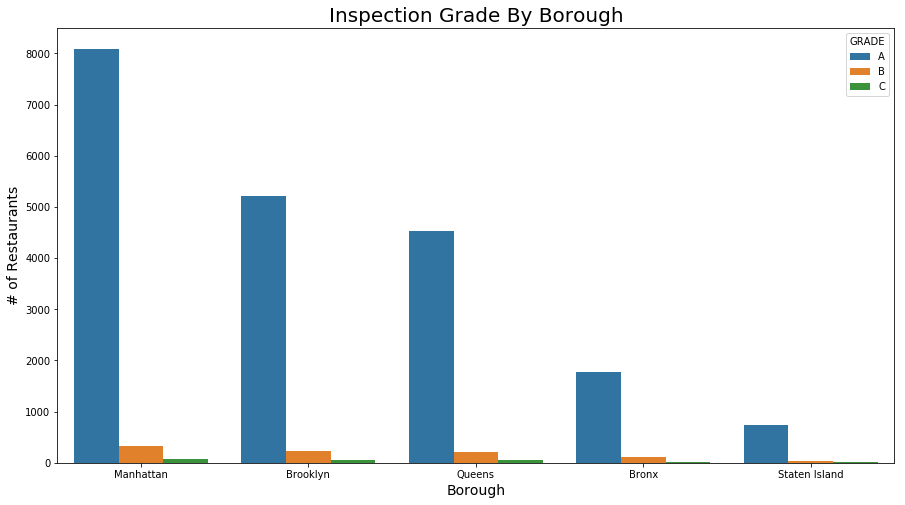

In [26]:
# Create a bar chart comparing the # of each grade inspections in each borough:
plt.figure(figsize=(15,8))
sns.countplot(data=df_inspec_filtered_temp, x='BORO',hue='GRADE')

# Add chart title and labels
plt.title('Inspection Grade By Borough', fontsize=20)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('# of Restaurants', fontsize=14);

It looks like the majority of restaurants have an 'A' inspection grade, and a 'C' grade is given to the least number of restaurants in each borough. 

Many of the restaurants have had multiple inspections recorded. Let's see if certain boroughs are more likely to have many inspections.

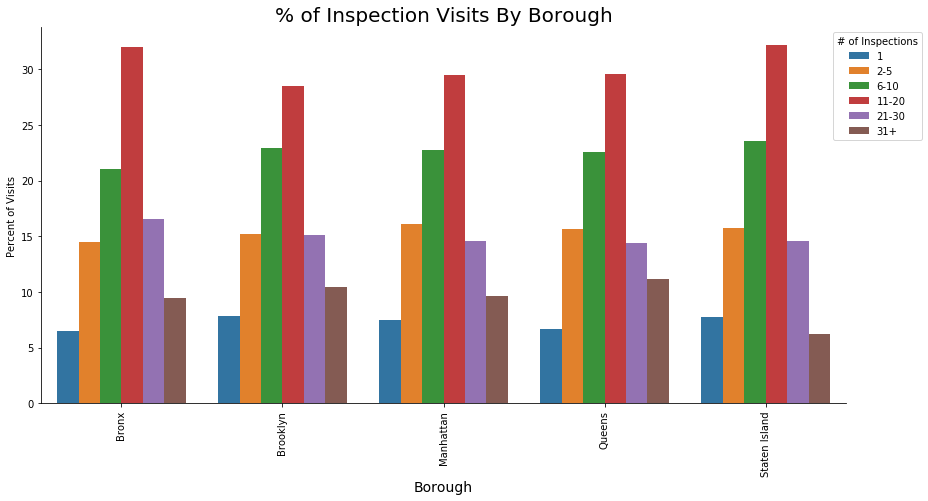

In [27]:
# Define a function that will create ranges representing the value in the count column:
def count_range(x):
    '''This function will replace a numerical value with a corresponding range label.'''
    if x == 1:
        return '1'
    elif 2<=x<=5:
        return '2-5'
    elif 6<=x<=10:
        return '6-10'
    elif 11<=x<=20:
        return '11-20'
    elif 21<=x<=30:
        return '21-30'
    else:
        return '31+'

# Add a new column that gives a range of the number of visits based on the '#_of_inspections' column:
df_inspec_filtered['count_range'] = df_inspec_filtered['#_of_inspections'].apply(lambda x: count_range(x))

# Create a bar chart comparing the % of inspection visits for each borough:
x,y = 'BORO', 'count_range'
(df_inspec_filtered.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Visits')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Visits',hue=y,kind='bar',
                           hue_order = ['1','2-5','6-10','11-20','21-30','31+'],height=6, aspect=2, legend=False))

# Add chart title, labels, and legend
plt.title('% of Inspection Visits By Borough', fontsize=20)
plt.legend(loc='upper right', title = '# of Inspections', bbox_to_anchor=(1.1, 1))
plt.xlabel('Borough', fontsize=14)
plt.xticks(rotation='vertical');

We see a similar trend across all boroughs, with 11-20 visits being most common, followed by 6-10 visits. Having only 1 visit is typically the least common. This is not too surprising as restaurants can expect to get an inspection at least once a year and therefore even restaurants with an A grading and no violations will likely have as many inspections as years they have been in business.

For the rest of our investigation and analysis we are going to focus specifically on resturants in Manhattan. I am now going to combine only the Manhattan inspection data with Manhattan data from our Yelp dataset.

In [28]:
# Merge our 2 datasets using the restaurant's phone number:
df_merged = pd.merge(df_inspec_filtered, df_filtered, on=("display_phone"))

# Remove any restaurants not in Manhattan:
df_merged = df_merged.loc[df_merged['BORO']=='Manhattan']

# Reset index:
df_merged.reset_index(drop=True, inplace=True)

# Show new dataframe:
print('Length of Dataframe:',len(df_merged))
df_merged.head()

Length of Dataframe: 3930


CAMIS                     DBA       BORO BUILDING            STREET  \
0  41322152  1 2 3 BURGER SHOT BEER  Manhattan      738         10 AVENUE   
1  41430594       1 STOP PATTY SHOP  Manhattan     1708  AMSTERDAM AVENUE   
2  50059935  108 FOOD DRIED HOT POT  Manhattan     2794          BROADWAY   
3  41092609    10TH AVENUE COOKSHOP  Manhattan      156         10 AVENUE   
4  50057272        11 HANOVER GREEK  Manhattan       11        HANOVER SQ   

   ZIPCODE   display_phone CUISINE DESCRIPTION INSPECTION DATE  \
0  10019.0  (212) 315-0123            American      2019-12-20   
1  10031.0  (212) 491-7466              Bakery      2019-03-27   
2  10025.0  (917) 675-6878             Chinese      2019-05-23   
3  10011.0  (212) 924-4440            American      2019-04-11   
4  10005.0  (212) 785-4000               Greek      2019-02-28   

                                            ACTION     ...     wine_bars  \
0  Violations were cited in the following area(s).     ...             0   
1  Violations were cited in the following area(s).     ...             0   
2  Violations were cited in the following area(s).     ...             0   
3  Violations were cited in the following area(s).     ...             1   
4  Violations were cited in the following area(s).     ...             1   

  womenscloth wraps delivery pickup  restaurant_reservation  num_of_cat  \
0           0     0        1      1                       0           3   
1           0     0        0      0                       0           2   
2           0     0        1      1                       0           2   
3           0     0        1      1                       0           3   
4           0     0        1      1                       0           3   

   mainstream_category rare_category price_value  
0                    1             0           1  
1                    1             0           1  
2                    1             0           2  
3                    1             0           2  
4                    1             0           3  

[5 rows x 304 columns]

### 3.2 Cuisine Type
To start, let's take a look at how many restaurants fall into each cuisine type. There are a lot of different types of cuisine included in our dataset, so we will look just at the 20 most common cuisines.

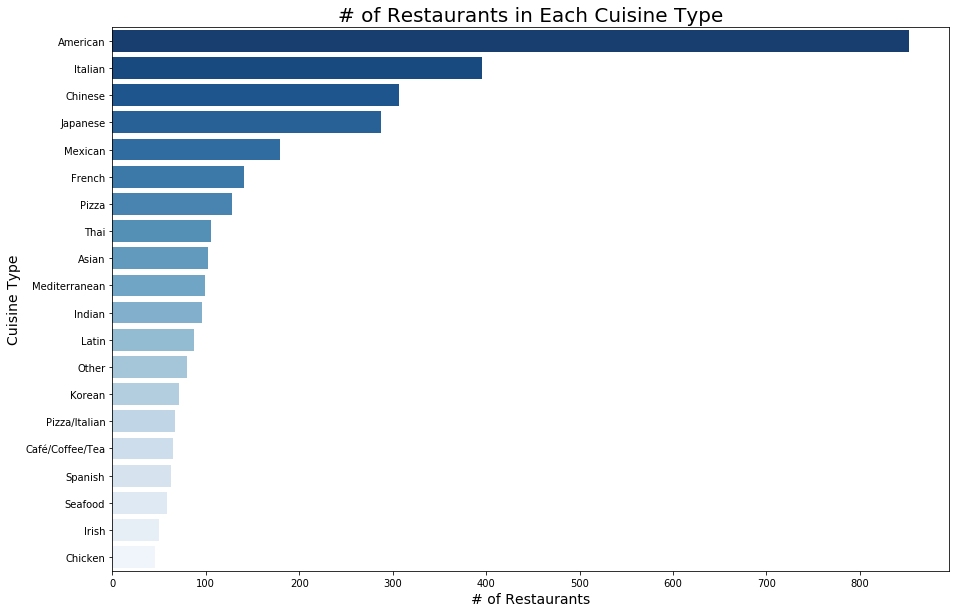

In [29]:
# Replace the long description for Latin restuarants with 'Latin'
df_merged['CUISINE DESCRIPTION'].replace(
    {'Latin (Cuban, Dominican, Puerto Rican, South & Central American)':'Latin'},inplace=True)

# Create a list of the 20 most frequent cuisine types:
cuisine_type = df_merged['CUISINE DESCRIPTION'].value_counts()[:20].index.tolist()

# Create a temporary dataframe including only restaurants that are in the 20 most popular cuisine types:
df_merged_cuis = df_merged.loc[df_merged['CUISINE DESCRIPTION'].isin(cuisine_type)].copy()

# Create a horizontal bar chart comparing the # of each grade inspections in each cuisine type:
plt.figure(figsize=(15,10))
sns.countplot(data=df_merged_cuis, y='CUISINE DESCRIPTION', 
              order = df_merged_cuis['CUISINE DESCRIPTION'].value_counts().index,palette='Blues_r')
# Add chart title and labels
plt.title('# of Restaurants in Each Cuisine Type', fontsize=20)
plt.xlabel('# of Restaurants', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14);

Our most popular cuisines are American, Italian, Chinese, Japanese, and Mexican.

Let's now see how inspection grades vary by cuisine. 

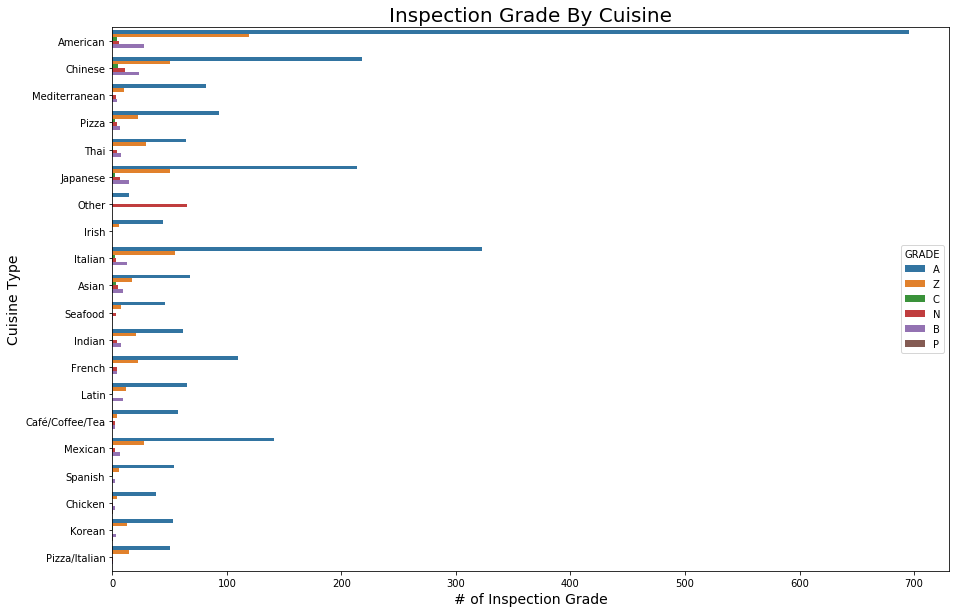

In [30]:
# Create a horizontal bar chart comparing the # of each grade inspections in each cuisine type:
plt.figure(figsize=(15,10))
sns.countplot(data=df_merged_cuis, y='CUISINE DESCRIPTION', hue='GRADE')

# Add chart title and labels
plt.title('Inspection Grade By Cuisine', fontsize=20)
plt.xlabel('# of Inspection Grade', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14);

Overall, most restaurants appear to primarily consist of 'A' grades. In particular, there are a lot of 'A' grades for our most populous cuisine types: American, Italian, Japanese, Chinese, and Mexican. We also see a good amount of restaurants with pending grades ('Z') in these same categories.

Let's see if any particular cuisines have a greater amount of inspection visits than others.

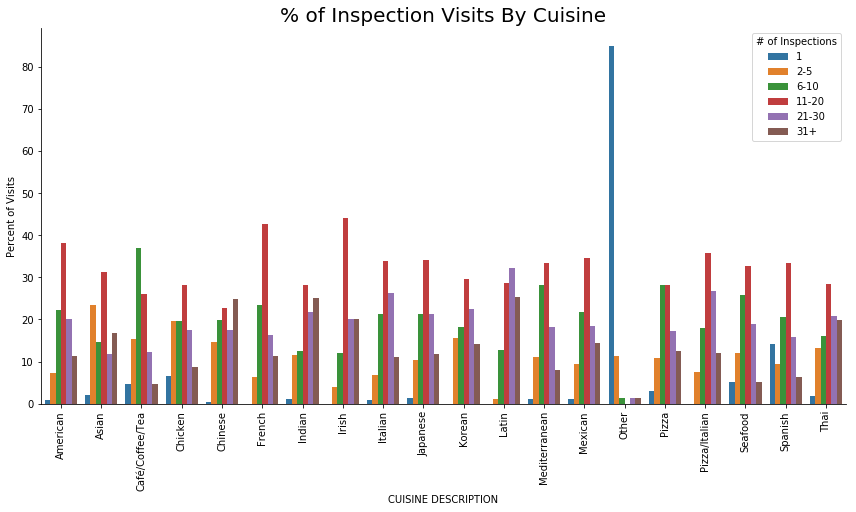

In [32]:
# Add a new column that gives a range of the number of visits based on the '#_of_inspections' column:
df_merged_cuis['count_range'] = df_merged_cuis['#_of_inspections'].apply(lambda x: count_range(x))

# Create a bar chart comparing the % of inspection visits for each cuisine:
x,y = 'CUISINE DESCRIPTION', 'count_range'
(df_merged_cuis.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Visits')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Visits',hue=y,kind='bar',
                           hue_order = ['1','2-5','6-10','11-20','21-30','31+'],height=6, aspect=2, legend=False))

# Add chart title and legend
plt.title('% of Inspection Visits By Cuisine', fontsize=20)
plt.legend(loc='upper right', title='# of Inspections')
plt.xticks(rotation='vertical');

It looks like 'Asian', 'Spanish', and 'Other' have more restaurants with fewer inspection visits, indicating they either have fewer violations or they consist of a lot of newer restaurants and therefore have not had as many visits yet. Latin, Indian, and Thai seem to have the greatest number of inspection visits.

Moving on from the inspections, let's see if certain cuisines tend to get more or less Yelp reviews. This graph is going to show us the mean number of reviews per cuisine type.

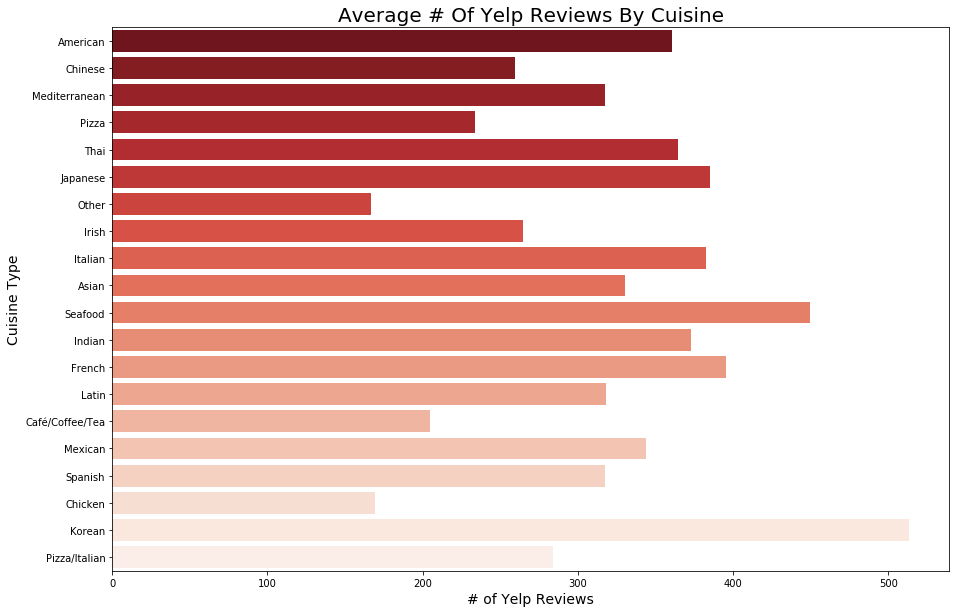

In [33]:
# Create a horizontal bar chart comparing the # of Yelp reviews in each cuisine type:
plt.figure(figsize=(15,10))
sns.barplot(data=df_merged_cuis, x='review_count',y='CUISINE DESCRIPTION',palette='Reds_r', ci=None)

# Add chart title, labels, and legend
plt.title('Average # Of Yelp Reviews By Cuisine', fontsize=20)
plt.xlabel('# of Yelp Reviews', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14);

On average, Korean restaurants have the most reviews, followed by Seafood and then French food.

Now let's see if certain cuisines tend to have better or worse Yelp ratings.

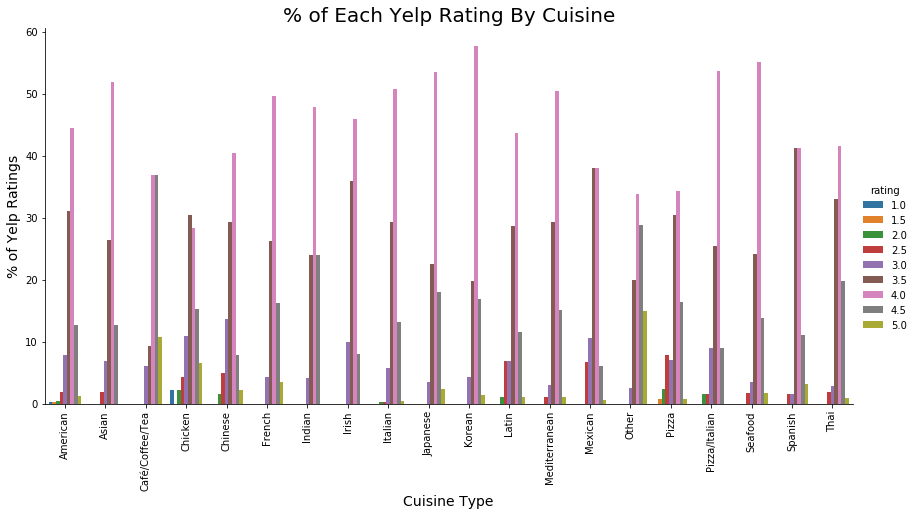

In [34]:
# Create a bar chart comparing the % of each Yelp rating for each cuisine:
x,y = 'CUISINE DESCRIPTION', 'rating'
(df_merged_cuis.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Ratings')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Ratings',hue=y,kind='bar',
                           height=6, aspect=2, legend=True))

# Add chart title and labels:
plt.title('% of Each Yelp Rating By Cuisine', fontsize=20)
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('% of Yelp Ratings', fontsize=14)
plt.xticks(rotation='vertical');

The majority of cuisines have mostly 4.0 ratings, followed by 3.5. In particular, Korean, Seafood, Pizza/Italian, Japanese, and Asian have the most 4.0 ratings. Cafe/Coffee/Tea and Other appear to have the most 5.0 ratings. Mexican, Pizza, Chinese, and Latin appear to have the most lower Yelp ratings.

### 3.3 Manhattan Neighborhood 

Let's see how price, Yelp ratings, and inspection grades vary by neighborhood in Manhattan. First, let's take a look at how many restaurants there are in each Manhattan neighborhood.

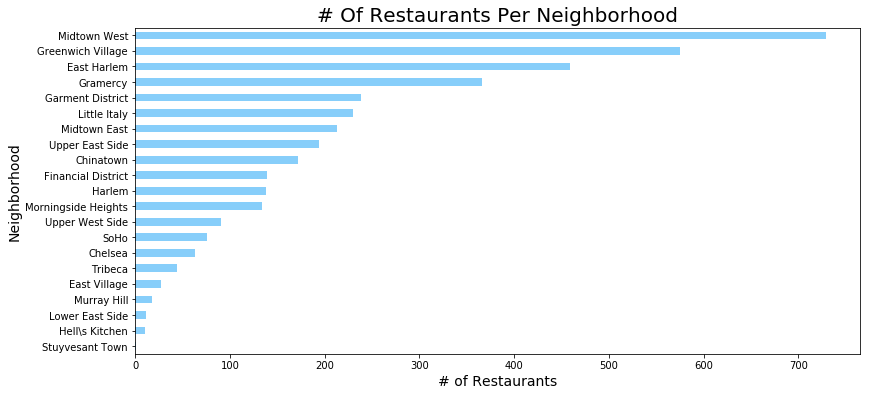

In [36]:
# Create a bar chart comparing the # of restaurants in each neighborhood:
plt.figure(figsize=(15,8))
df_merged['neighborhood'].value_counts(normalize=False, ascending=True).plot(kind='barh', 
                                                             figsize=(13,6),
                                                             color='lightskyblue')
# Add chart title and labels
plt.title('# Of Restaurants Per Neighborhood', fontsize=20)
plt.ylabel('Neighborhood', size=14)
plt.xlabel('# of Restaurants' , size=14)
plt.show()

Midtown West has the greatest number of restaurants, followed by Greenwich Village and East Harlem.

Let's see how price varies by neighborhood.

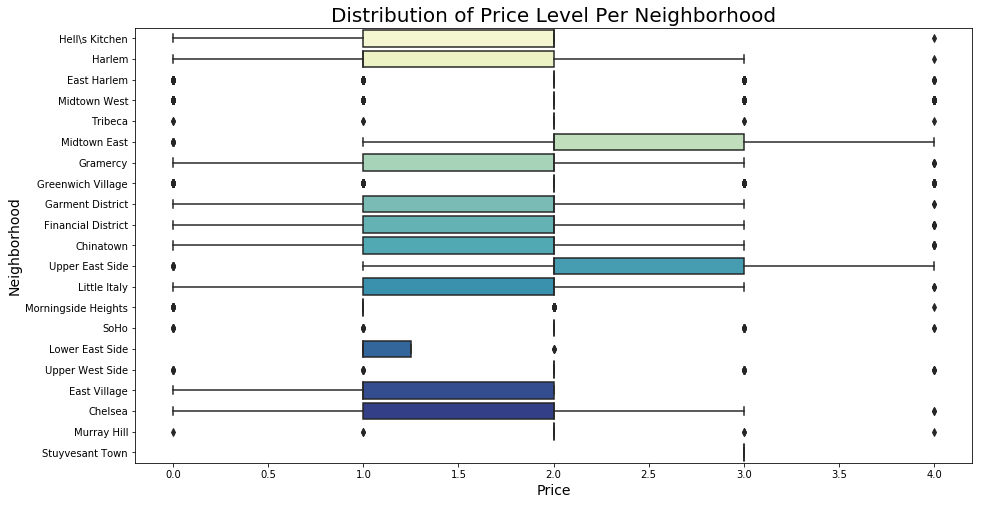

In [38]:
# Create a box plot comparing the distribution of different price levels in each nieghborhood:
plt.figure(figsize=(15,8))
sns.boxplot(y="neighborhood", x="price_value", data=df_merged, palette='YlGnBu')

# Add chart title and labels:
plt.title('Distribution of Price Level Per Neighborhood',size=20)
plt.ylabel('Neighborhood',size=14)
plt.xlabel('Price',size=14)
plt.show()

Midtown East and Upper East Side have comparatively more expensive restaurants, with the average falling in the 2-3 dollar sign range. Most other nieghborhoods average in the 1-2 dollar sign price range.

Let's see how the distribution of Yelp ratings looks by neighborhood.

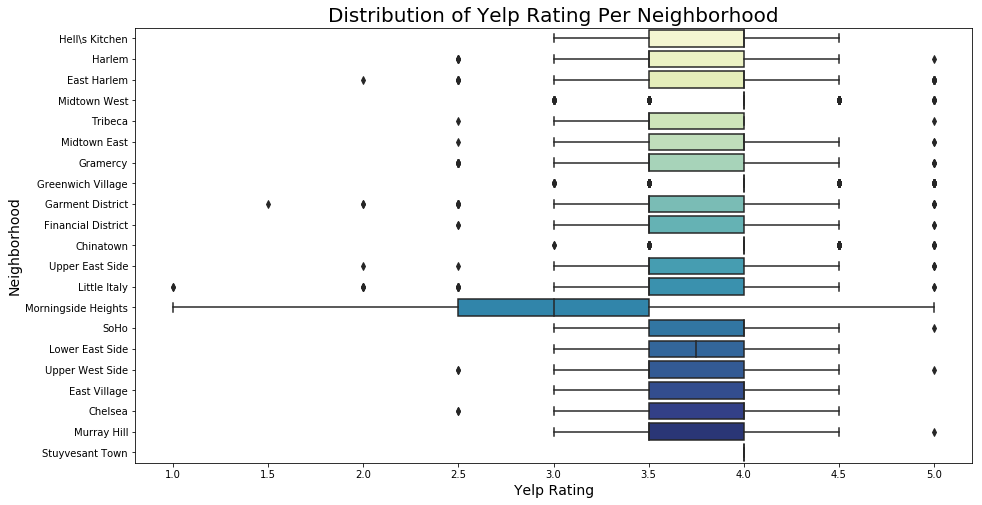

In [39]:
# Create a box plot comparing the distribution of different Yelp ratings in each nieghborhood:
plt.figure(figsize=(15,8))
sns.boxplot(y="neighborhood", x="rating", data=df_merged, palette='YlGnBu')

# Add chart title and labels:
plt.ylabel('Neighborhood',size=14)
plt.xlabel('Yelp Rating',size=14)
plt.title('Distribution of Yelp Rating Per Neighborhood',size=20)
plt.show()

On average, many neighborhoods have a similar spread of Yelp ratings, though Morningside Heights has the worst ratings. 

Next, let's look at the inspection grades by neighborhood. We'll look only at the restaurants that have received an actual grade (i.e. A, B, C).

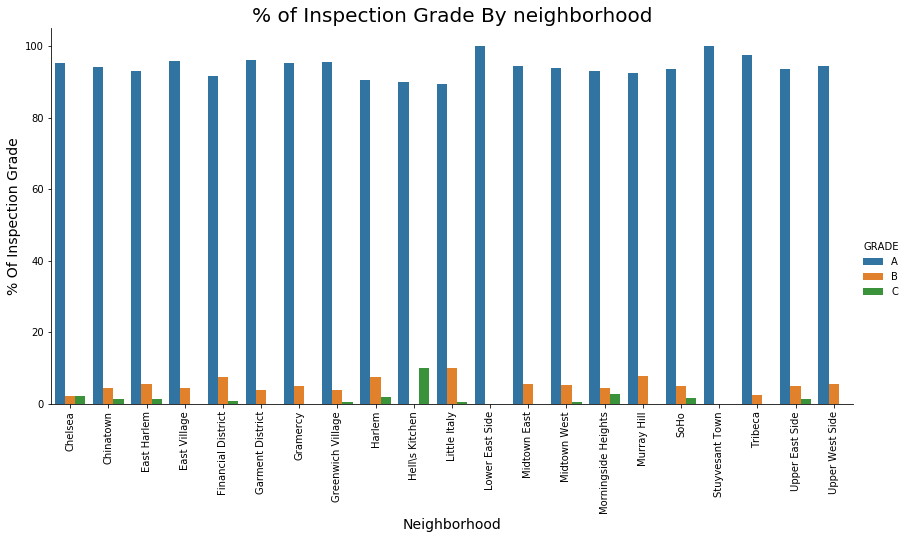

In [40]:
# Create a temporary dataframe that includes only the restaurants that have been given an inspection grade:
df_merged_temp = df_merged.loc[df_merged['GRADE'].isin(['A','B','C'])].copy()

# Create a bar chart comparing the % of inspection grades for each neighborhood:
x,y = 'neighborhood', 'GRADE'
(df_merged_temp.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Grade')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Grade',hue=y,kind='bar',
                           hue_order = ['A','B','C'],height=6, aspect=2, legend=True))

# Add chart title and labels:
plt.title('% of Inspection Grade By neighborhood', fontsize=20)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('% Of Inspection Grade', fontsize=14)
plt.xticks(rotation='vertical');

All of the neighborhoods have a majority of 'A' inspection grades. It looks like Little Italy has the greatest percentage of 'B' grades and Hell's Kitchen has the greatest percentage of 'C'.

### 3.4 Inspection Grade

Let's first take a look at how many of each grade (A, B, and C) we have in our dataset.

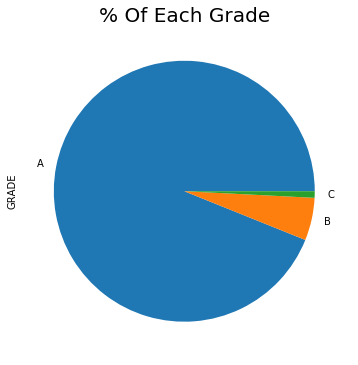

In [41]:
# Plot a pie chart that shows the breakout of each grade:
plt.figure(figsize=(12,6))
df_merged_temp['GRADE'].value_counts().plot(kind='pie')
plt.title('% Of Each Grade', fontsize=20);

The vast majority of our restaurants appear to have 'A' grades.

Now let's see if certain grades (including pending grades) are likely to have more or less inspection visits.

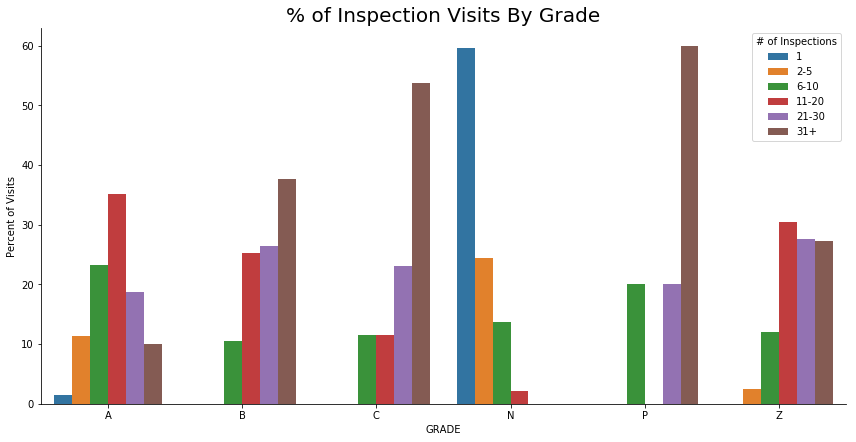

In [42]:
# Create a bar chart comparing the % of inspection visits for each grade:
x,y = 'GRADE', 'count_range'
(df_merged.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Visits')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Visits',hue=y,kind='bar', 
                           hue_order = ['1','2-5','6-10','11-20','21-30','31+'],height=6, aspect=2, legend=False))

# Add chart title and legend:
plt.title('% of Inspection Visits By Grade', fontsize=20)
plt.legend(loc='upper right', title='# of Inspections');

Those restaurants that are not yet graded are most likely to only have 1 visit, likely because they are new restaurants. We also see that restaurants with a 'B' or 'C' grade are likely to have more inspection visits than restaurants with an 'A' grade, likely because these restaurants have violations (leading to their 'B' or 'C' grades) and therefore needed extra inspections.

Let's now see if the ratio of A, B, and C grades varies by the price level of restaurants.

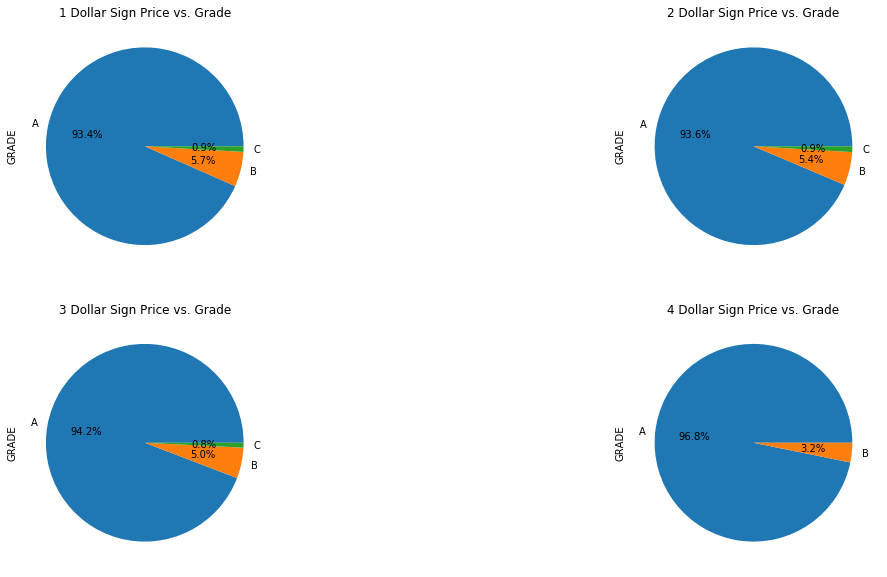

In [43]:
# Set plot figure for each pie chart
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,10))

# Select the data for each different price:
df_merged_1 = df_merged_temp[df_merged_temp['price_value']==1]
df_merged_2 = df_merged_temp[df_merged_temp['price_value']==2]
df_merged_3 = df_merged_temp[df_merged_temp['price_value']==3]
df_merged_4 = df_merged_temp[df_merged_temp['price_value']==4]

# Plot a pie chart showing the breakouf of each grade for each price:
df_merged_1['GRADE'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%',
                                         title="1 Dollar Sign Price vs. Grade")
df_merged_2['GRADE'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%',
                                         title="2 Dollar Sign Price vs. Grade")
df_merged_3['GRADE'].value_counts().plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%',
                                         title="3 Dollar Sign Price vs. Grade")
df_merged_4['GRADE'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%',
                                         title="4 Dollar Sign Price vs. Grade");

The cheaper restaurants (1 and 2 Dollar Sign) have the greatest percent of B and C grades, while the most expensive restaurants (4 dollar signs) has the greatest percent of A grades and least percent of B and C grades. Therefore, as price rises, inspection grades improve.

Let's create a graph showing the # of Yelp reviews for restaurants in each inspection grade bucket based on the Yelp rating received.

# of Restaurants Per Yelp Rating: 
 rating
1.0       5
1.5       5
2.0      19
2.5      65
3.0     218
3.5     932
4.0    1463
4.5     460
5.0      49
Name: review_count, dtype: int64


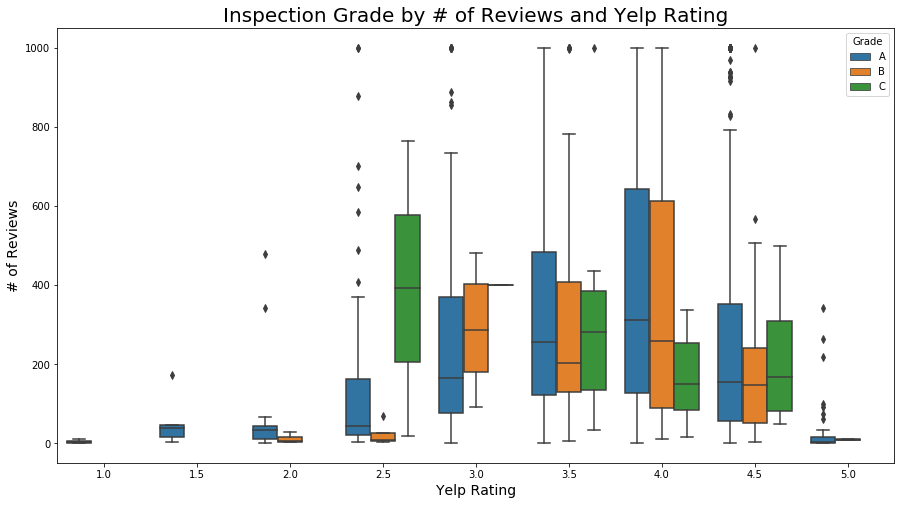

In [44]:
# Create a bar chart comparing the # of reviews vs. the Yelp ratings with a hue on inspection grade:
plt.figure(figsize=(15,8))
sns.boxplot(x="rating", y="review_count", hue="GRADE", data=df_merged_temp, hue_order=['A','B','C'])

# Print total number of reviews for each inspection grade:
print('# of Restaurants Per Yelp Rating:','\n',
      df_merged_temp['review_count'].groupby(df_merged_temp['rating']).count())

# Add chart title, labels, and legend:
plt.title('Inspection Grade by # of Reviews and Yelp Rating', fontsize=20)
plt.xlabel('Yelp Rating', fontsize=14)
plt.ylabel('# of Reviews', fontsize=14)
plt.legend(loc='upper right', title='Grade');

It looks like the greatest number of reviews are typically given to restaurants in the 3.5-4.5 range. Few reviews are given for 5 star or 2 and below stars, though this is likely because few restaurants acheived these ratings.  Additionally, restaurants with a 2.5 rating and a 'C' inspection grade seem to comparatively have a lot of reviews. This is likely because consumers had a bad experienceat the restaurant and want to share their bad experience with others to warn others about the restaurant. We also see some outliers specifically for restaurants with an 'A' grade, indicating that very positive expereince may help encourage consumers to write reviews. 

### 3.5 Yelp Ratings

The last thing we are going to dive into is the Yelp rating. Let's see how the price levels vary by Yelp rating.

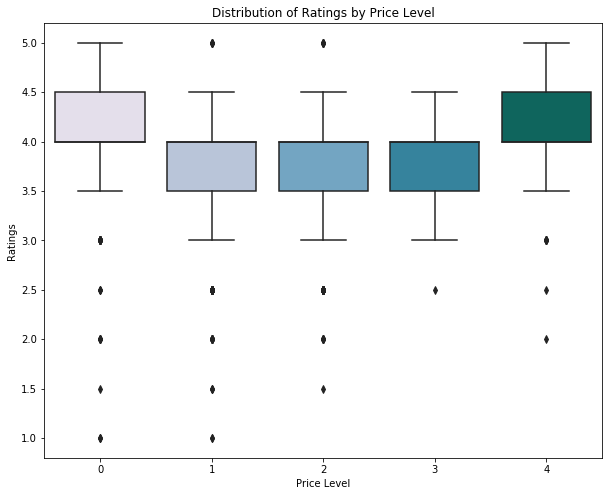

In [45]:
# Plot chart showing distribution of Yelp ratings by each price level:
plt.figure(figsize=(10,8))
sns.boxplot(y="rating", x="price_value", data=df_merged, palette='PuBuGn')

#Add chart title and labels:
plt.ylabel('Ratings')
plt.xlabel('Price Level')
plt.title('Distribution of Ratings by Price Level')
plt.show()

Restaurants at the highest price level (4 dollar signs) tend to have better Yelp ratings. We all see better Yelp ratings for restaurants with an unknown price level. 

Now let's take a look at how many reviews are present for restaurants of each different Yelp rating.

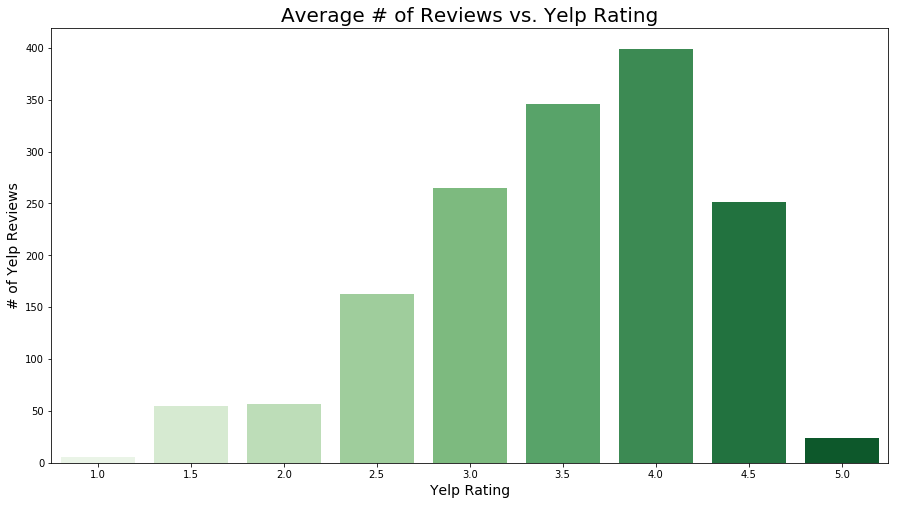

In [46]:
# Create a bar chart comparing the # of reviews vs. the Yelp ratings:
plt.figure(figsize=(15,8))
sns.barplot(x="rating", y="review_count", data=df_merged, palette='Greens',ci=None)

# Add chart title and labels:
plt.title('Average # of Reviews vs. Yelp Rating', fontsize=20)
plt.xlabel('Yelp Rating', fontsize=14)
plt.ylabel('# of Yelp Reviews', fontsize=14);

Restaurants with 4.0 Yelp ratings have the greatest number of Yelp reviews, though keep in mind that a 4.0 rating is also the most common rating given to restaurants.

Now let's see if Yelp ratings vary for restaurants in a mainstream category vs. in a rare category. A mainstream category is any category that appeared more than 150 times in our dataset, while a rare category is any category that appears less than 150 times in our dataset.

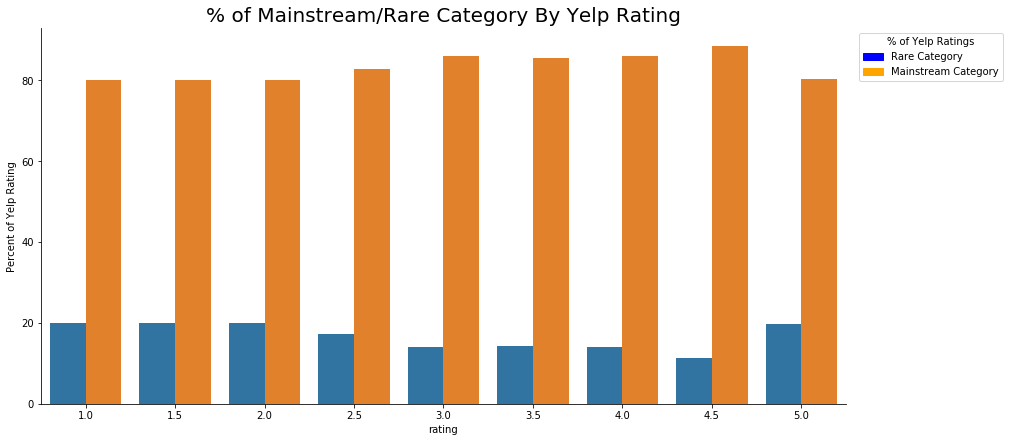

In [47]:
# Create a bar chart comparing the % of Yelp ratings for mainstream and rare categories:
x,y = 'rating', 'mainstream_category'
g = (df_merged.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Yelp Rating')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Yelp Rating',hue=y,kind='bar', 
                           height=6, aspect=2, legend=False))

# Add chart title and legend:
plt.title('% of Mainstream/Rare Category By Yelp Rating', fontsize=20)
# Identify which color each of the new labels will be for the legend:
blue_patch = mpatches.Patch(color='Blue', label='Rare Category')
orange_patch = mpatches.Patch(color='Orange', label='Mainstream Category')
plt.legend(loc='best',handles=[blue_patch,orange_patch], title='% of Yelp Ratings',bbox_to_anchor=(1.01, 1));

While mainstream categories are of course more prevalent for all ratings due to the fact that there are so many more mainstream category restaurants, restaurants having a 4.5 Yelp grade have the greatest percentage of mainstream categories. Alternatively, being on either the very upper (5.0) or lower (1.0-2.0) end of the Yelp ratings seem to have the greatest number of rare categories. 

# Restaurant Map

I will now create a map that marks where each restaurant is located. When you click on a restaurant's marker, it will display the resturant's name, price, Yelp rating, and inspection grade. Since our dataset is rather large, I have created 2 maps, each consisting of half of our dataset.

In [48]:
# Create map:
yelp_map = folium.Map([40.774371, -73.95931], zoom_start=12)

# Select values to be used to identify the location of each restaurant and turn these values into a list:
locations = df_merged[['latitude', 'longitude']]
locationlist = locations.values.tolist()

# Add markers to map and add details (i.e. name, price, rating, grade) to each marker:
for i in range(0,len(locationlist)//2):
    details = "{} \nPrice: {} Rating: {} Grade: {}".format(df_merged['name'][i], str(df_merged['price'][i]),
                                                                           str(df_merged['rating'][i]),
                                                                               str(df_merged['GRADE'][i]))
    popup = folium.Popup(details, parse_html=True)
    folium.Marker(locationlist[i], popup=popup).add_to(yelp_map)

# Show map:
yelp_map

In [49]:
# Create map:
yelp_map = folium.Map([40.774371, -73.95931], zoom_start=12)

# Select values to be used to identify the location of each restaurant and turn these values into a list:
locations = df_merged[['latitude', 'longitude']]
locationlist = locations.values.tolist()

# Add markers to map and add details (i.e. name, price, rating, grade) to each marker:
for i in range(len(locationlist)//2,len(locationlist)):
    details = "{} \nPrice: {} Rating: {} Grade: {}".format(df_merged['name'][i], str(df_merged['price'][i]),
                                                                           str(df_merged['rating'][i]),
                                                                               str(df_merged['GRADE'][i]))
    popup = folium.Popup(details, parse_html=True)
    folium.Marker(locationlist[i], popup=popup).add_to(yelp_map)
# Show map:
yelp_map

Now that we've explored our data, we can move onto the modeling phase which will be located in separate notebooks. In order to avoid having to re-do all of our data scrubbing, I will pickle the dataset we are using so it is easy to use in the modeling notebooks.

In [50]:
# Save Dataset:
with open ('scrubbed_data.pickle','wb')as f:
     pickle.dump(df_merged, f)